### **Hướng dẫn phân tích phổ tần số và dự đoán các thành phần chuỗi thời gian**

Dữ liệu về lợi tức trái phiếu chính phủ kéo dài 80 năm chứa nhiều thông tin giá trị. Để phân tách và dự đoán các thành phần, chúng ta sẽ thực hiện các bước sau:

---

### **1. Phân tích phổ tần số để phân tách chuỗi**

#### **1.1. Xử lý dữ liệu ban đầu**
- **Kiểm tra tính dừng:** Áp dụng kiểm định ADF, KPSS để xác định tính dừng. Nếu chuỗi không dừng, cần loại bỏ xu hướng hoặc sai phân.
- **Biến đổi Box-Cox (nếu cần):** Ổn định phương sai nếu dữ liệu có sự biến đổi lớn.

#### **1.2. Phân tích phổ tần số (Frequency Domain Analysis)**
Phân tích phổ giúp phân tách các thành phần theo tần số dao động (xu hướng, chu kỳ, mùa vụ, phần dư).

1. **Biến đổi Fourier:**
   - Áp dụng **Fast Fourier Transform (FFT)** để chuyển chuỗi thời gian từ miền thời gian sang miền tần số.
   - Phân tích phổ để xác định các tần số chi phối:
     - Tần số thấp: Xu hướng dài hạn (trend).
     - Tần số trung bình: Chu kỳ kinh tế hoặc chính trị (cycle).
     - Tần số cao: Tính mùa vụ (seasonal) và nhiễu.

2. **Band-pass Filtering:**
   - Sử dụng bộ lọc Butterworth hoặc Gaussian để chia tách các tần số cụ thể:
     - **Xu hướng:** Tần số rất thấp (cắt giảm mọi tần số trên ngưỡng thấp, ví dụ: \(f < 0.1\)).
     - **Chu kỳ:** Tần số trung bình (ví dụ: \(0.1 \leq f \leq 0.5\)).
     - **Mùa vụ:** Tần số cao (ví dụ: \(f > 0.5\)).

3. **Phân tách thành phần:**
   - Kết hợp **Inverse FFT (IFFT)** để tái tạo từng thành phần trong miền thời gian:
     - **Trend:** Xu hướng dài hạn của lợi tức.
     - **Cycle:** Các chu kỳ dao động do khủng hoảng kinh tế hoặc chính trị.
     - **Seasonal:** Tính mùa vụ ngắn hạn.
     - **Residual:** Thành phần còn lại sau khi loại bỏ các yếu tố trên.

#### **1.3. Visualization:**
- Vẽ các thành phần để kiểm tra chất lượng phân tách:
  - Thành phần **Trend**: Đường cong dài hạn.
  - Thành phần **Cycle**: Dao động không đều, liên quan đến chu kỳ kinh tế.
  - Thành phần **Seasonal**: Dao động đều đặn với chu kỳ ngắn.
  - Thành phần **Residual**: Thành phần ngẫu nhiên không giải thích được.

---

### **2. Mô hình hóa và dự đoán các thành phần**

#### **2.1. Dự đoán thành phần Trend**
- Xu hướng dài hạn thường có tính chất tuyến tính hoặc tăng trưởng phi tuyến, phù hợp với các mô hình sau:
  - **Polynomial Regression (Bậc 2 hoặc 3):** Dùng hồi quy đa thức để dự đoán xu hướng.
  - **Exponential Smoothing (Holt):** Làm mịn và dự đoán xu hướng dài hạn.
  - **ARIMA:** Nếu xu hướng có tự hồi quy.

#### **2.2. Dự đoán thành phần Cycle**
- Thành phần chu kỳ có thể được dự đoán bằng:
  - **Fourier Series Models:** Phù hợp với các chu kỳ đều đặn (đã xác định từ FFT).
  - **VAR/VECM (Vector Error Correction Model):** Khi chu kỳ phụ thuộc vào các biến kinh tế vĩ mô khác.
  - **Dynamic Factor Models:** Trích xuất chu kỳ từ nhiều chuỗi có liên quan.

#### **2.3. Dự đoán thành phần Seasonal**
- Tính mùa vụ thường được xử lý với:
  - **SARIMA:** Xử lý tự động các thành phần mùa vụ.
  - **Holt-Winters:** Dự đoán dựa trên mức độ mùa vụ, xu hướng và ngẫu nhiên.
  - **Wavelet Transform Models:** Mô hình hóa tính mùa vụ trong miền tần số.

#### **2.4. Dự đoán thành phần Residual**
- Phần dư thường chứa nhiễu hoặc tính bất định có thể được xử lý bằng:
  - **GARCH (Generalized Autoregressive Conditional Heteroskedasticity):**
    - Đo lường và dự đoán phương sai thay đổi.
  - **Hybrid Models (GARCH/LSTM):**
    - Dùng GARCH để dự đoán biến động ngắn hạn và LSTM để học các mẫu phi tuyến phức tạp.
  - **DeepAR:** Dự đoán chuỗi thời gian với nhiều yếu tố ngẫu nhiên.

---

### **3. Quy trình tổng hợp và dự báo**
1. **Phân tích phổ để phân tách:** 
   - Chạy FFT để xác định các tần số chính.
   - Áp dụng bộ lọc để phân tách thành 4 thành phần.

2. **Huấn luyện mô hình riêng lẻ:** 
   - Huấn luyện các mô hình khác nhau trên từng thành phần:
     - **Trend:** Polynomial Regression hoặc ARIMA.
     - **Cycle:** Fourier Series hoặc VAR.
     - **Seasonal:** SARIMA hoặc Wavelet Models.
     - **Residual:** GARCH hoặc GARCH/LSTM.

3. **Tổng hợp kết quả dự đoán:**
   - Kết hợp kết quả của từng mô hình thành dự báo cuối cùng:
  
     $$
     \text{Forecast}_{t} = \text{Trend}_{t} + \text{Cycle}_{t} + \text{Seasonal}_{t} + \text{Residual}_{t}
     $$

4. **Đánh giá dự báo:**
   - Đánh giá chất lượng dự báo trên tập kiểm tra:
     - RMSE, MAE, hoặc MAPE.
     - Kiểm tra phần dư còn sót lại (Ljung-Box, ARCH LM Test).

---

### **4. Công cụ và Thư viện**
- **Python:**
  - Phân tích phổ: `scipy.signal`, `numpy.fft`.
  - Dự đoán:
    - `statsmodels` (ARIMA, SARIMA, GARCH).
    - `scikit-learn` (Hồi quy).
    - `tensorflow/keras` (LSTM, GRU).
  - Visualization: `matplotlib`, `seaborn`.
- **R:**
  - Phân tích FFT: `spec.pgram`.
  - Mô hình: `forecast`, `fGarch`, `tsDyn`.

---

Kết hợp phân tích phổ tần số và các mô hình chuyên dụng sẽ giúp bạn dự đoán chính xác các thành phần riêng biệt trong dữ liệu. Nếu cần chi tiết về một bước cụ thể hoặc triển khai code, hãy cho tôi biết!

# Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Giả sử dữ liệu của bạn được load vào dataframe df
df = pd.read_csv("../data/data.csv")
df['Adj Close'] = df['Adj Close'].interpolate(method='linear')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.asfreq('D')  # Gán tần số hàng ngày

# Chỉ quan tâm đến cột Adj Close
data = df['Adj Close']
data = data.interpolate(method='linear')  # Lấp đầy giá trị thiếu

print(data.head(15))

# Phân chia dữ liệu
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size

train = data[:train_size]
test = data[train_size:]


Date
1960-01-04    4.520000
1960-01-05    4.550000
1960-01-06    4.680000
1960-01-07    4.630000
1960-01-08    4.590000
1960-01-09    4.573333
1960-01-10    4.556667
1960-01-11    4.540000
1960-01-12    4.540000
1960-01-13    4.560000
1960-01-14    4.510000
1960-01-15    4.490000
1960-01-16    4.450000
1960-01-17    4.410000
1960-01-18    4.370000
Freq: D, Name: Adj Close, dtype: float64


# Phân tích phổ và phân tách chuỗi

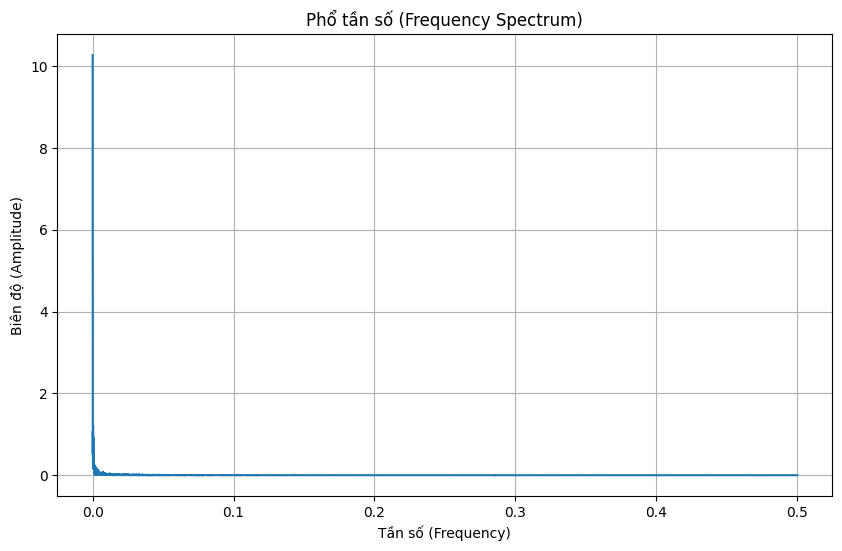

In [3]:
from scipy.fft import fft, fftfreq
# Sử dụng FFT để chuyển đổi chuỗi từ miền thời gian sang miền tần số
# Phổ tần số cho thấy các tần số chi phối dữ liệu, giúp nhận diện các thành phần như trend, cycle, và seasonal.

# Biến đổi Fourier
N = len(train)  # Số lượng điểm dữ liệu
T = 1  # Khoảng cách thời gian giữa hai điểm dữ liệu (ngày)

yf = fft(train.values)
xf = fftfreq(N, T)[:N//2]

# Vẽ phổ tần số
plt.figure(figsize=(10, 6))
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.title("Phổ tần số (Frequency Spectrum)")
plt.xlabel("Tần số (Frequency)")
plt.ylabel("Biên độ (Amplitude)")
plt.grid()
plt.show()


In [ ]:
# Áp dụng bộ lọc tần số
# Sử dụng bộ lọc Butterworth để phân tách các thành phần dựa trên tần số:
from scipy.signal import butter, filtfilt


# Hàm lọc Butterworth
def butter_filter(data, lowcut=None, highcut=None, fs=1.0, order=5):
    nyquist = 5 * fs  # Tần số Nyquist
    if lowcut and highcut:
        b, a = butter(order, [lowcut / nyquist, highcut / nyquist], btype="band")
    elif lowcut:
        b, a = butter(order, lowcut / nyquist, btype="low")
    elif highcut:
        b, a = butter(order, highcut / nyquist, btype="high")
    else:
        raise ValueError("Specify lowcut or highcut.")
    return filtfilt(b, a, data)


# Phân tách thành phần
trend = butter_filter(train.values, highcut=0.005)  # Xu hướng (tần số thấp)
cycle = butter_filter(train.values, lowcut=0.005, highcut=0.02)  # Chu kỳ
seasonal = butter_filter(train.values, lowcut=0.02)  # Tính mùa vụ
residual = train.values - (trend + cycle + seasonal)  # Phần dư

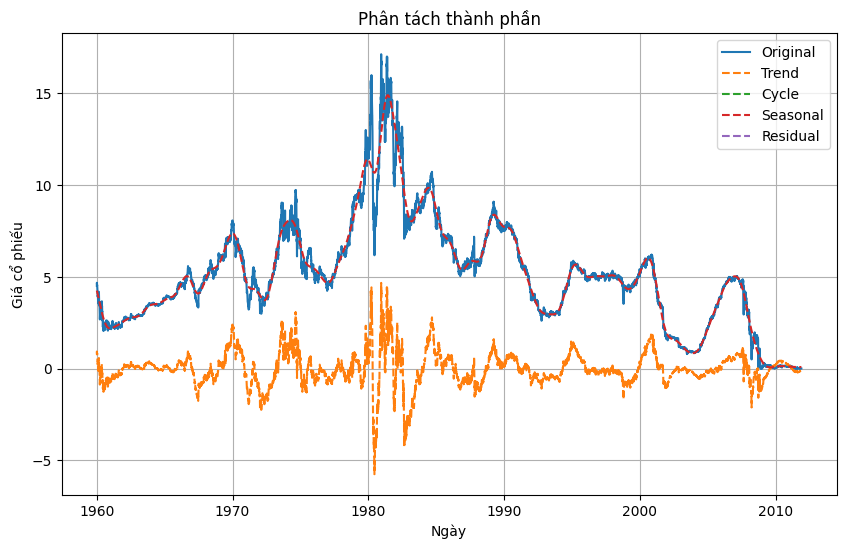

In [5]:
# Plot các thành phần
plt.figure(figsize=(10, 6))
plt.plot(train.index, train.values, label="Original")
plt.plot(train.index, trend, label="Trend", linestyle="--")
plt.plot(train.index, cycle, label="Cycle", linestyle="--")
plt.plot(train.index, seasonal, label="Seasonal", linestyle="--")
plt.plot(train.index, residual, label="Residual", linestyle="--")
plt.legend()
plt.title("Phân tách thành phần")
plt.xlabel("Ngày")
plt.ylabel("Giá cổ phiếu")
plt.grid()
plt.show()

# Cac kiem dinh du lieu

In [ ]:
# Kiem tra cac thanh phan co la stationary hay khong
from statsmodels.tsa.stattools import adfuller


# Hàm kiểm tra stationary
def check_stationary(data):
    result = adfuller(data)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:", result[4])
    if result[1] <= 0.05:
        print("Dữ liệu stationary")
    else:
        print("Dữ liệu không stationary")


# Kiểm tra tính ngẫu nhiên
from statsmodels.stats.diagnostic import acorr_ljungbox


# Hàm kiểm tra tính ngẫu nhiên
def check_randomness(data, name):
    data = pd.Series(data).dropna()
    lb_test = acorr_ljungbox(data, lags=10)
    pval = lb_test[1][0]  # Giá trị p-value của kiểm định LB

    print(f"{name} - Kiểm định Ljung-Box:")
    print(f"Chi-squared: {lb_test[0][0]:.3f}, p-value: {pval:.3e}")
    if pval < 0.05:
        print("Kết luận: Dữ liệu không ngẫu nhiên.\n")
    else:
        print("Kết luận: Dữ liệu ngẫu nhiên.\n")


from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.api import OLS, add_constant


# Hàm kiểm định phương sai thay đổi
def check_heteroscedasticity(series, name):
    series = pd.Series(series).dropna()
    x = add_constant(range(len(series)))  # Biến giải thích là thời gian
    y = series.values
    model = OLS(y, x).fit()
    bp_test = het_breuschpagan(model.resid, x)
    pval = bp_test[1]  # Giá trị p-value của kiểm định BP

    print(f"{name} - Kiểm định Breusch-Pagan:")
    print(f"Chi-squared: {bp_test[0]:.3f}, p-value: {pval:.3e}")
    if pval < 0.05:
        print("Kết luận: Có phương sai thay đổi.\n")
    else:
        print("Kết luận: Không có phương sai thay đổi.\n")


# Kiểm tra từng thành phần
print("Trend:")
check_stationary(trend)
print("\nCycle: NaN")
# check_stationary(cycle)
print("\nSeasonal:")
check_stationary(seasonal)
print("\nResidual: NaN")
# check_stationary(residual)

Trend:
ADF Statistic: -8.499633029308923
p-value: 1.2484337894720302e-13
Critical Values: {'1%': -3.430696005093455, '5%': -2.861692921601393, '10%': -2.566851396074945}
Dữ liệu stationary

Cycle: NaN

Seasonal:
ADF Statistic: 5.101021009344749
p-value: 1.0
Critical Values: {'1%': -3.4306952561026995, '5%': -2.86169259059411, '10%': -2.5668512198852858}
Dữ liệu không stationary

Residual: NaN


In [ ]:
check_heteroscedasticity(trend, "Trend")
check_heteroscedasticity(seasonal, "Seasonal")

Trend - Kiểm định Breusch-Pagan:
Chi-squared: 182.591, p-value: 1.317e-41
Kết luận: Có phương sai thay đổi.

Seasonal - Kiểm định Breusch-Pagan:
Chi-squared: 226.093, p-value: 4.240e-51
Kết luận: Có phương sai thay đổi.



In [21]:
cycle, seasonal, residual

(array([nan, nan, nan, ..., nan, nan, nan]),
 array([4.25359113, 4.24547721, 4.23733376, ..., 0.08686389, 0.08686389,
        0.08686389]),
 array([nan, nan, nan, ..., nan, nan, nan]))

In [ ]:
import numpy as np

def get_log(series, epsilon=1e-6):
    """Lấy log của chuỗi để giảm biến động phương sai."""
    series = pd.Series(series).dropna()
    if (series <= 0).any():
        print("Warning: Chuỗi có giá trị <= 0, thêm epsilon trước khi lấy log.")
    return np.log(series + epsilon)

def get_diff(series, level=1):
    """Lấy sai phân cấp độ (level) của chuỗi."""
    series = pd.Series(series).dropna()
    for _ in range(level):
        series = series.diff().dropna()
    return series.dropna()


# Lấy log
log_trend = get_log(trend)
log_seasonal = get_log(seasonal)

# Lấy sai phân
diff_trend = get_diff(log_trend)
diff_seasonal = get_diff(log_seasonal)

# check_randomness(diff_trend, "Trend")
# check_randomness(diff_seasonal, "Seasonal")

/Data/Projects/venv_manager/ai_work#311/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


KeyError: 1

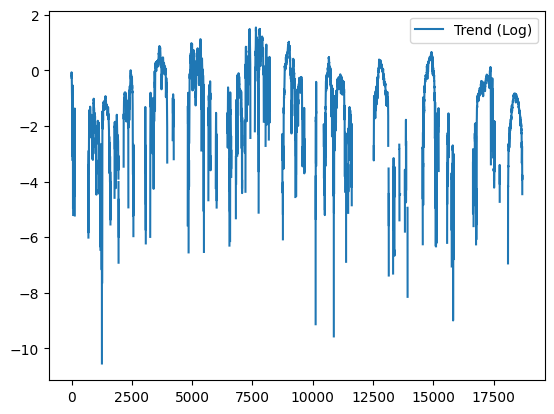

In [12]:
plt.plot(log_trend, label="Trend (Log)")
plt.legend()

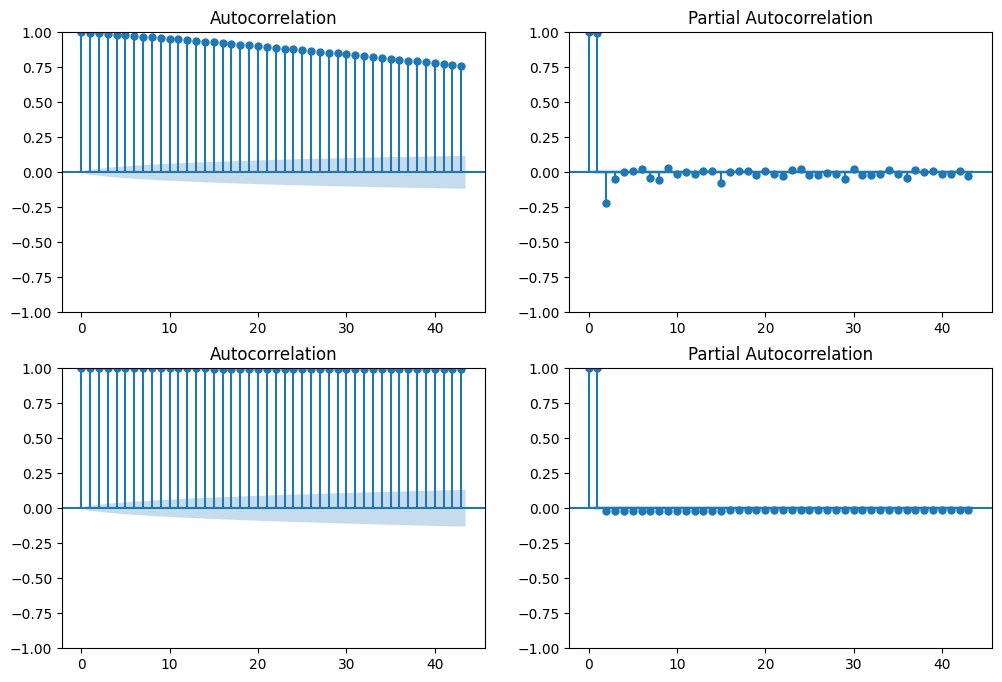

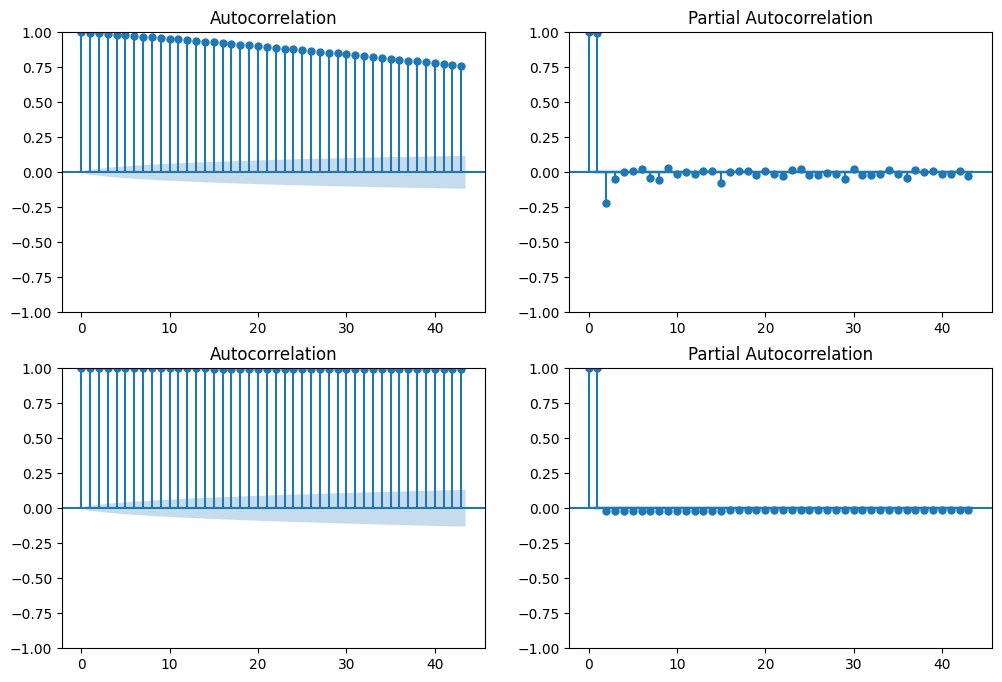

In [10]:
# Plot acf, pacf of trend and diff 1 of seasonal
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, 2, figsize=(12, 8))
plot_acf(trend, ax=ax[0, 0])
plot_pacf(trend, ax=ax[0, 1])
plot_acf(seasonal, ax=ax[1, 0])
plot_pacf(seasonal, ax=ax[1, 1])

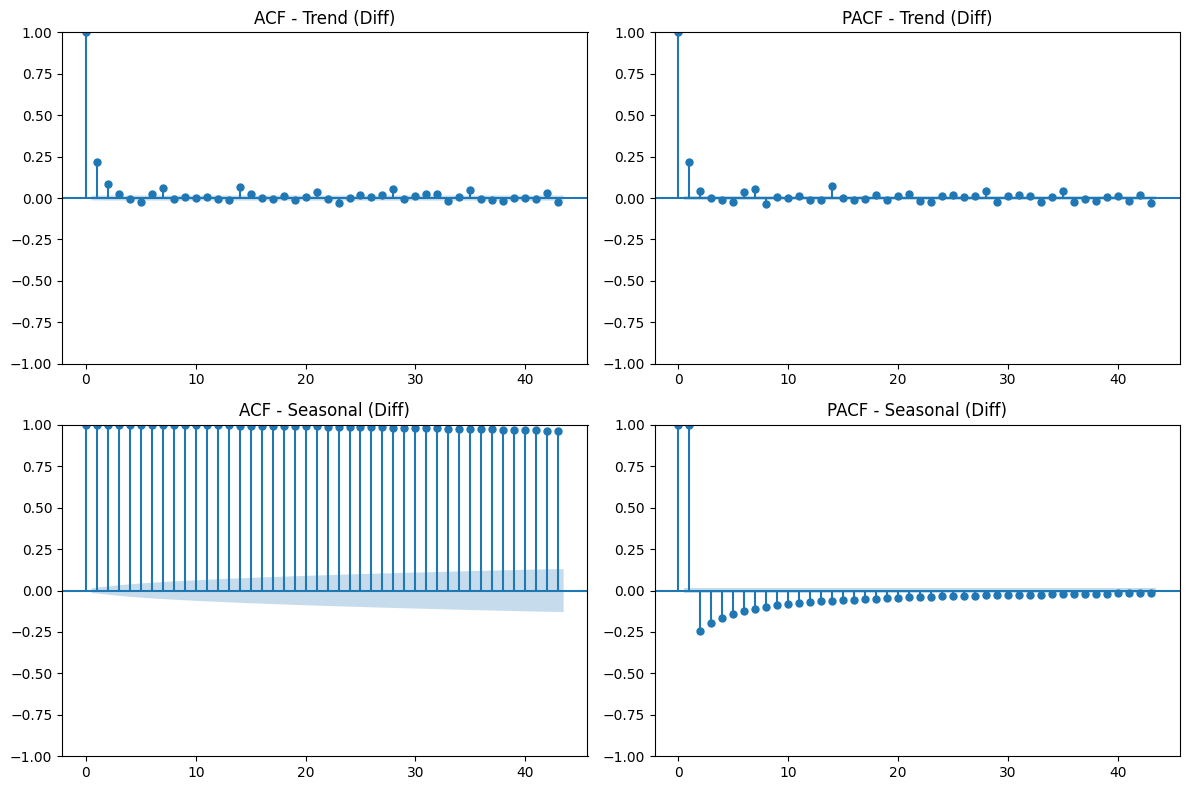

In [12]:
import pandas as pd

# Giả định trend và seasonal là numpy.ndarray
trend_series = pd.Series(trend, index=train.index)
seasonal_series = pd.Series(seasonal, index=train.index)

# Áp dụng .diff() để lấy sai phân
trend_diff = trend_series.diff().dropna()
seasonal_diff = seasonal_series.diff().dropna()

# Vẽ ACF và PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(12, 8))
plot_acf(trend_diff, ax=ax[0, 0], title="ACF - Trend (Diff)")
plot_pacf(trend_diff, ax=ax[0, 1], title="PACF - Trend (Diff)")
plot_acf(seasonal_diff, ax=ax[1, 0], title="ACF - Seasonal (Diff)")
plot_pacf(seasonal_diff, ax=ax[1, 1], title="PACF - Seasonal (Diff)")
plt.tight_layout()
plt.show()


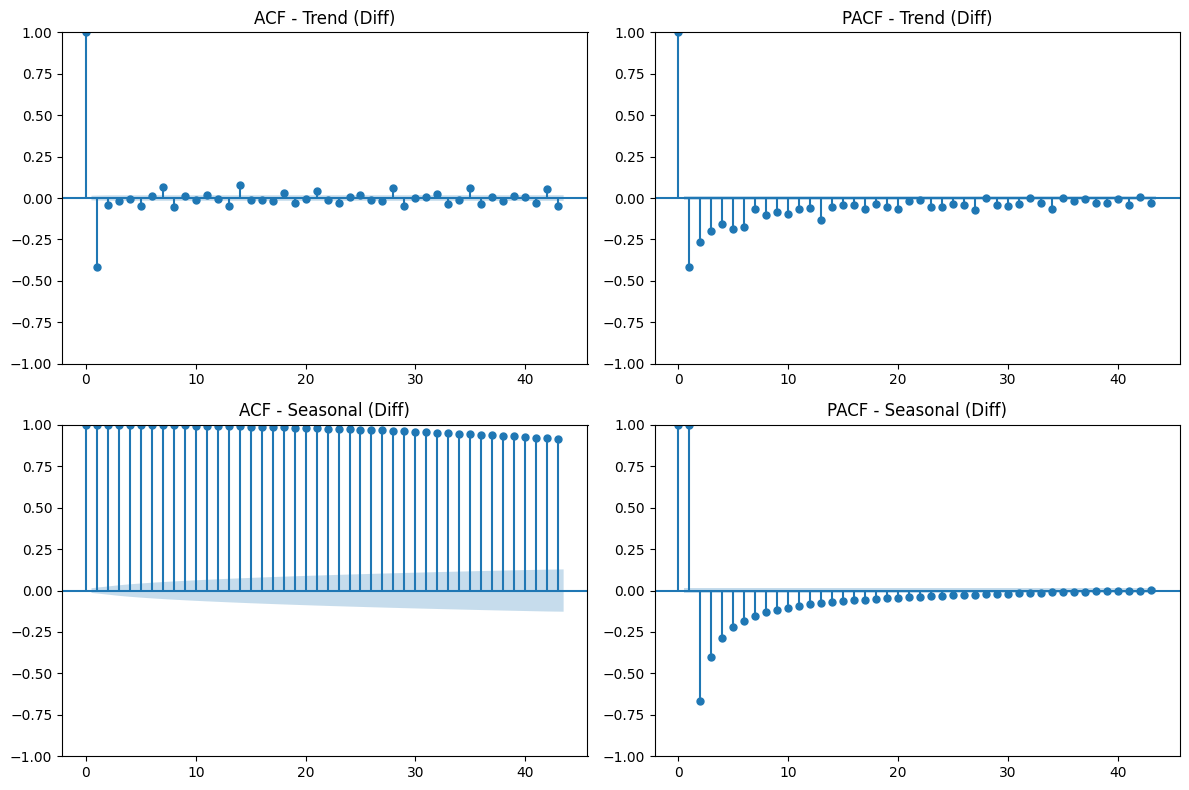

In [14]:
import pandas as pd

# Giả định trend và seasonal là numpy.ndarray
trend_series = pd.Series(trend, index=train.index)
seasonal_series = pd.Series(seasonal, index=train.index)

# Áp dụng .diff().dropna().diff() để lấy sai phân
trend_diff = trend_series.diff().dropna().diff().dropna()
seasonal_diff = seasonal_series.diff().dropna().diff().dropna()

# Vẽ ACF và PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(12, 8))
plot_acf(trend_diff, ax=ax[0, 0], title="ACF - Trend (Diff)")
plot_pacf(trend_diff, ax=ax[0, 1], title="PACF - Trend (Diff)")
plot_acf(seasonal_diff, ax=ax[1, 0], title="ACF - Seasonal (Diff)")
plot_pacf(seasonal_diff, ax=ax[1, 1], title="PACF - Seasonal (Diff)")
plt.tight_layout()
plt.show()


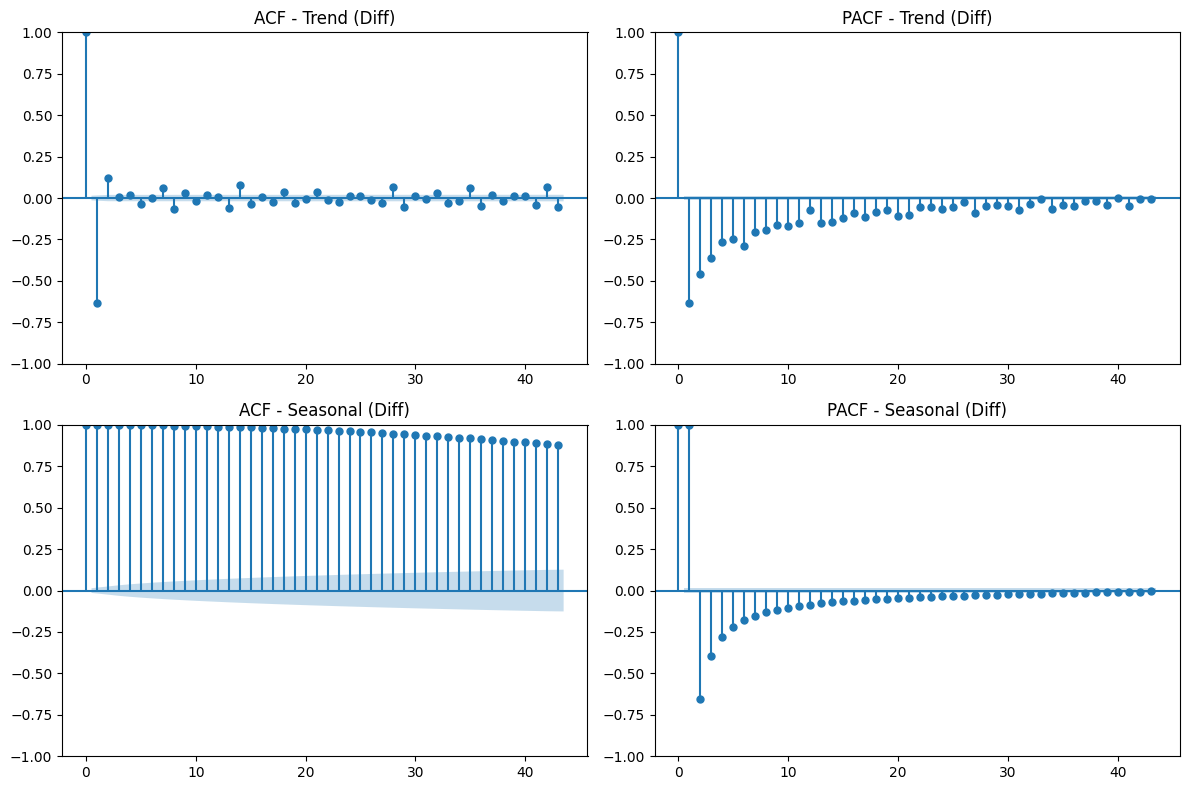

In [15]:
import pandas as pd

# Giả định trend và seasonal là numpy.ndarray
trend_series = pd.Series(trend, index=train.index)
seasonal_series = pd.Series(seasonal, index=train.index)

# Áp dụng .diff().dropna().diff() để lấy sai phân
trend_diff = trend_series.diff().dropna().diff().dropna().diff().dropna()
seasonal_diff = seasonal_series.diff().dropna().diff().dropna().diff().dropna()

# Vẽ ACF và PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(12, 8))
plot_acf(trend_diff, ax=ax[0, 0], title="ACF - Trend (Diff)")
plot_pacf(trend_diff, ax=ax[0, 1], title="PACF - Trend (Diff)")
plot_acf(seasonal_diff, ax=ax[1, 0], title="ACF - Seasonal (Diff)")
plot_pacf(seasonal_diff, ax=ax[1, 1], title="PACF - Seasonal (Diff)")
plt.tight_layout()
plt.show()


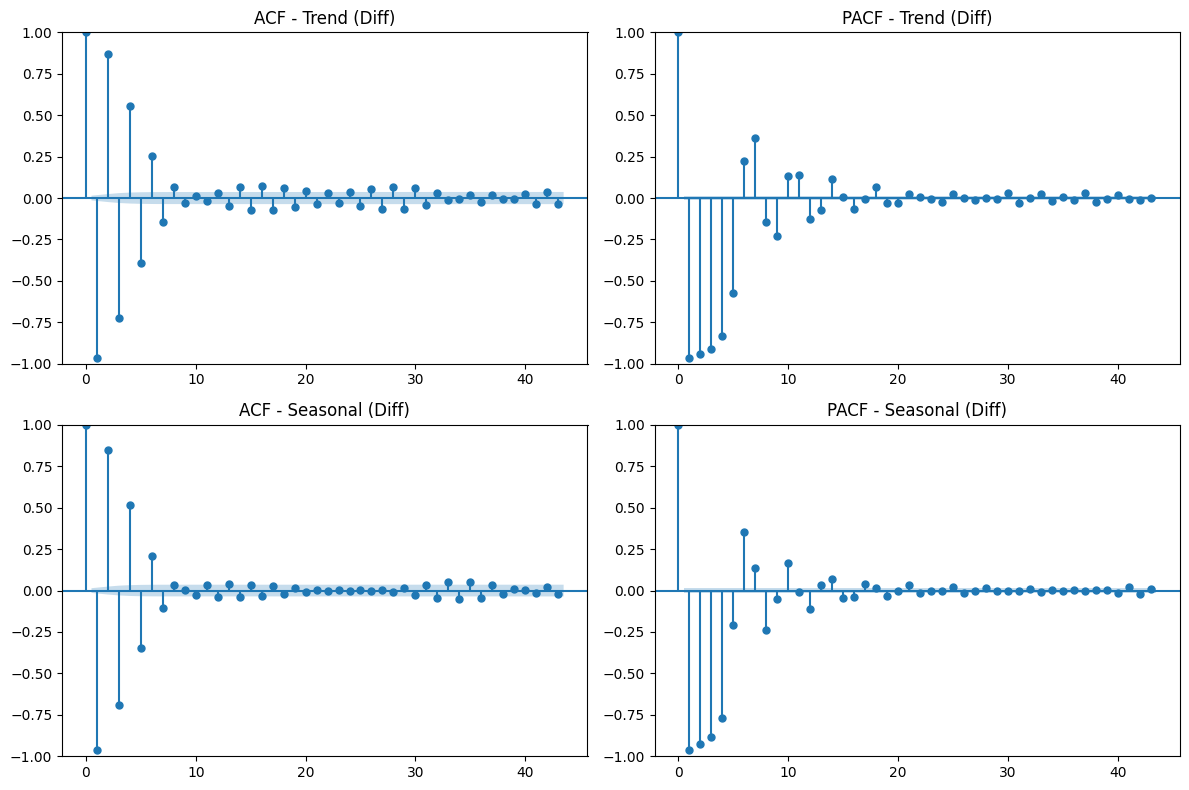

In [ ]:
import pandas as pd

# Giả định trend và seasonal là numpy.ndarray
trend_series = pd.Series(trend, index=train.index)
seasonal_series = pd.Series(seasonal, index=train.index)

# Áp dụng diff_function để lấy sai phân bac 30
trend_diff = trend_series.diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna()
seasonal_diff = seasonal_series.diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna()

# Vẽ ACF và PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(12, 8))
plot_acf(trend_diff, ax=ax[0, 0], title="ACF - Trend (Diff)")
plot_pacf(trend_diff, ax=ax[0, 1], title="PACF - Trend (Diff)")
plot_acf(seasonal_diff, ax=ax[1, 0], title="ACF - Seasonal (Diff)")
plot_pacf(seasonal_diff, ax=ax[1, 1], title="PACF - Seasonal (Diff)")
plt.tight_layout()
plt.show()


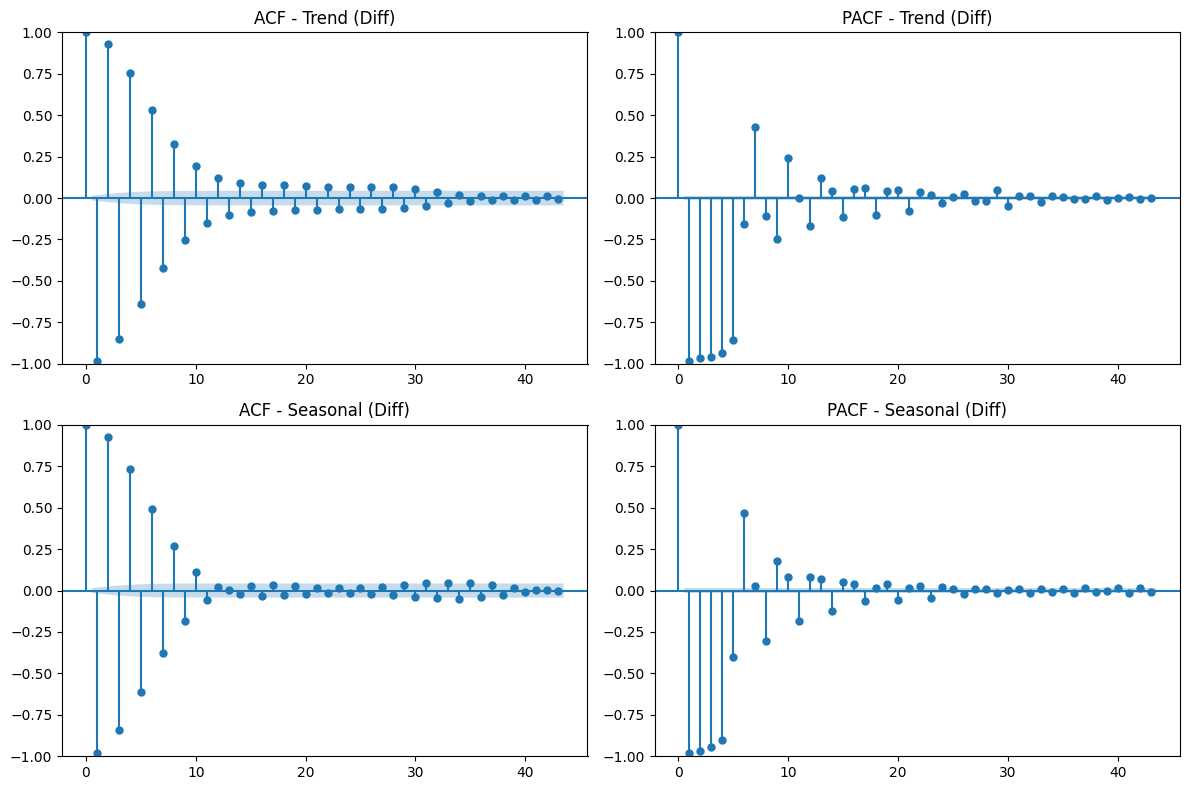

In [19]:
import pandas as pd

# Giả định trend và seasonal là numpy.ndarray
trend_series = pd.Series(trend, index=train.index)
seasonal_series = pd.Series(seasonal, index=train.index)

# Áp dụng diff_function để lấy sai phân
trend_diff30 = trend_series.diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna()
trend_diff60 = trend_diff30.diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna()

seasonal_diff30 = seasonal_series.diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna()
seasonal_diff60 = seasonal_diff30.diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna()

# Vẽ ACF và PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(12, 8))
plot_acf(trend_diff60, ax=ax[0, 0], title="ACF - Trend (Diff)")
plot_pacf(trend_diff60, ax=ax[0, 1], title="PACF - Trend (Diff)")
plot_acf(seasonal_diff60, ax=ax[1, 0], title="ACF - Seasonal (Diff)")
plot_pacf(seasonal_diff60, ax=ax[1, 1], title="PACF - Seasonal (Diff)")
plt.tight_layout()
plt.show()


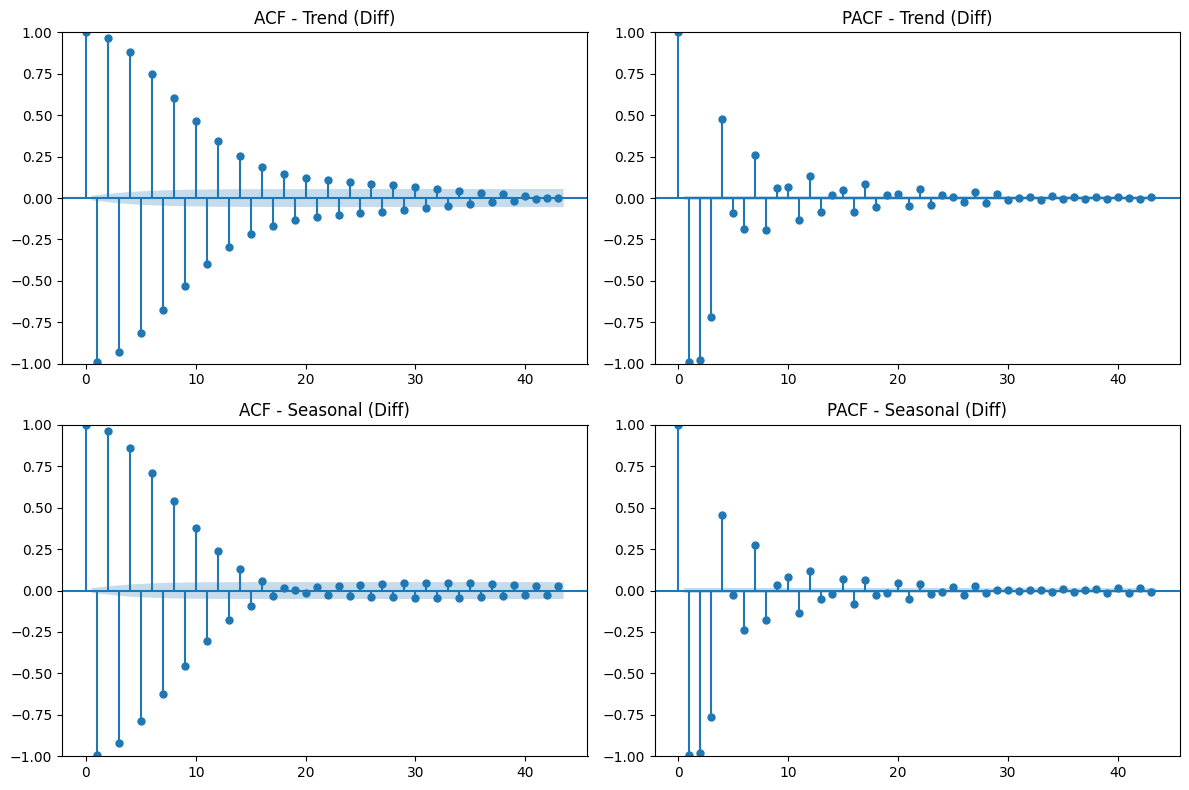

In [20]:
import pandas as pd

# Giả định trend và seasonal là numpy.ndarray
trend_series = pd.Series(trend, index=train.index)
seasonal_series = pd.Series(seasonal, index=train.index)

# Áp dụng diff_function để lấy sai phân
trend_diff90 = trend_diff60.diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna()
trend_diff120 = trend_diff90.diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna()

seasonal_diff90 = seasonal_diff60.diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna()
seasonal_diff120 = seasonal_diff90.diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna()

# Vẽ ACF và PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(12, 8))
plot_acf(trend_diff120, ax=ax[0, 0], title="ACF - Trend (Diff)")
plot_pacf(trend_diff120, ax=ax[0, 1], title="PACF - Trend (Diff)")
plot_acf(seasonal_diff120, ax=ax[1, 0], title="ACF - Seasonal (Diff)")
plot_pacf(seasonal_diff120, ax=ax[1, 1], title="PACF - Seasonal (Diff)")
plt.tight_layout()
plt.show()


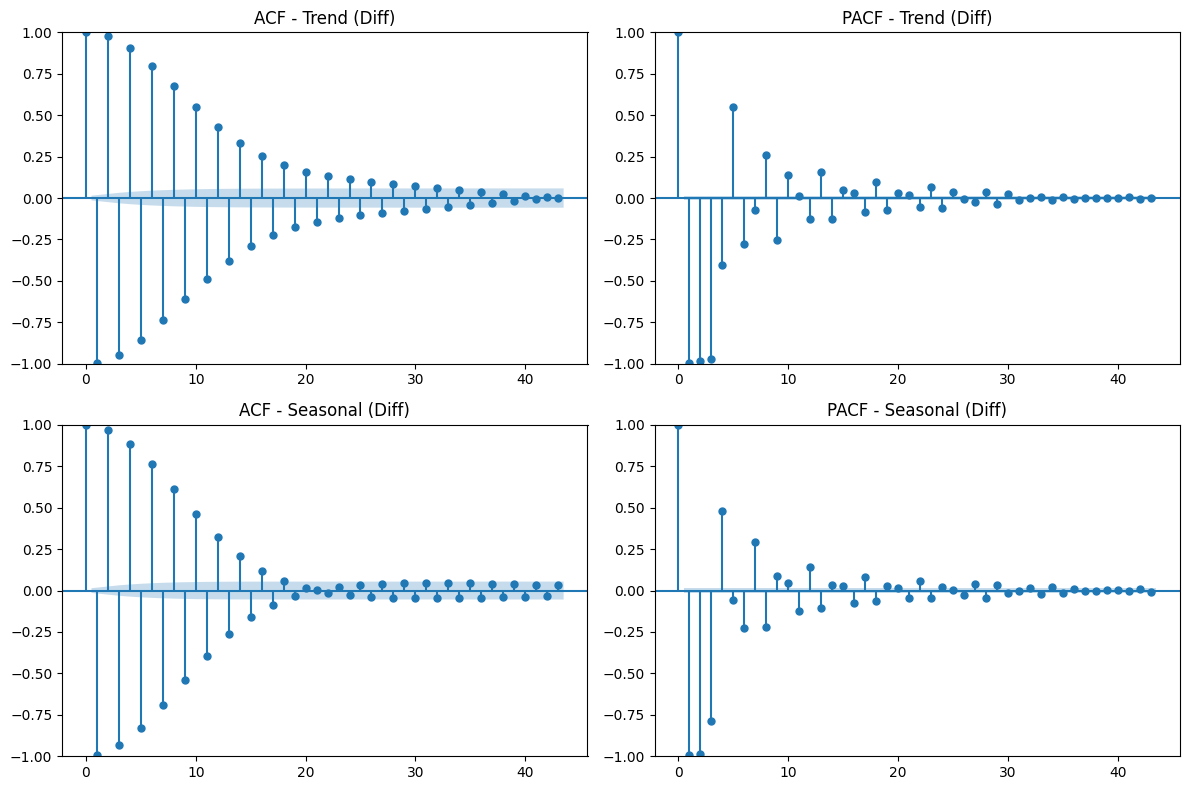

In [21]:
import pandas as pd

# Giả định trend và seasonal là numpy.ndarray
trend_series = pd.Series(trend, index=train.index)
seasonal_series = pd.Series(seasonal, index=train.index)

# Áp dụng diff_function để lấy sai phân
trend_diff120 = trend_diff90.diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna()
trend_diff150 = trend_diff120.diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna()

seasonal_diff120 = seasonal_diff90.diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna()
seasonal_diff150 = seasonal_diff120.diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna()

# Vẽ ACF và PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(12, 8))
plot_acf(trend_diff150, ax=ax[0, 0], title="ACF - Trend (Diff)")
plot_pacf(trend_diff150, ax=ax[0, 1], title="PACF - Trend (Diff)")
plot_acf(seasonal_diff150, ax=ax[1, 0], title="ACF - Seasonal (Diff)")
plot_pacf(seasonal_diff150, ax=ax[1, 1], title="PACF - Seasonal (Diff)")
plt.tight_layout()
plt.show()


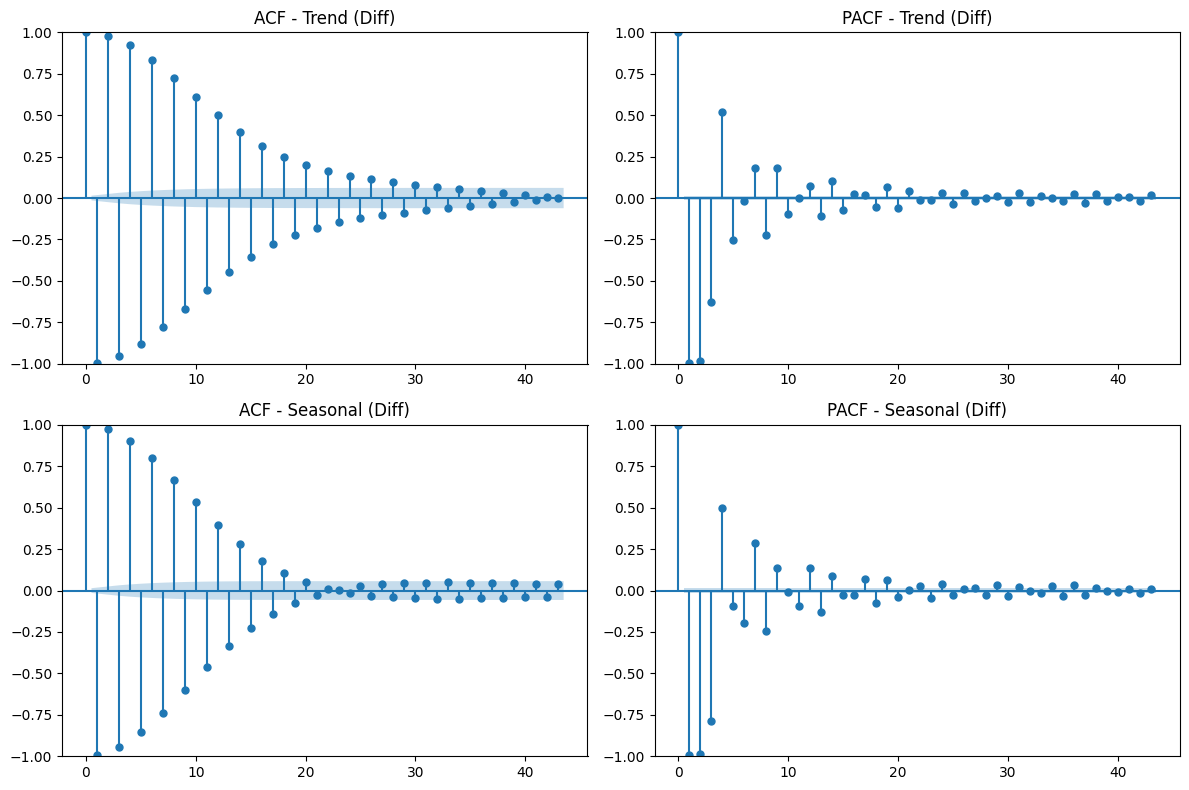

In [22]:
import pandas as pd

# Giả định trend và seasonal là numpy.ndarray
trend_series = pd.Series(trend, index=train.index)
seasonal_series = pd.Series(seasonal, index=train.index)

# Áp dụng diff_function để lấy sai phân
trend_diff150 = trend_diff120.diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna()
trend_diff180 = trend_diff150.diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna()

seasonal_diff150 = seasonal_diff120.diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna()
seasonal_diff180 = seasonal_diff150.diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna()

# Vẽ ACF và PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(12, 8))
plot_acf(trend_diff180, ax=ax[0, 0], title="ACF - Trend (Diff)")
plot_pacf(trend_diff180, ax=ax[0, 1], title="PACF - Trend (Diff)")
plot_acf(seasonal_diff180, ax=ax[1, 0], title="ACF - Seasonal (Diff)")
plot_pacf(seasonal_diff180, ax=ax[1, 1], title="PACF - Seasonal (Diff)")
plt.tight_layout()
plt.show()


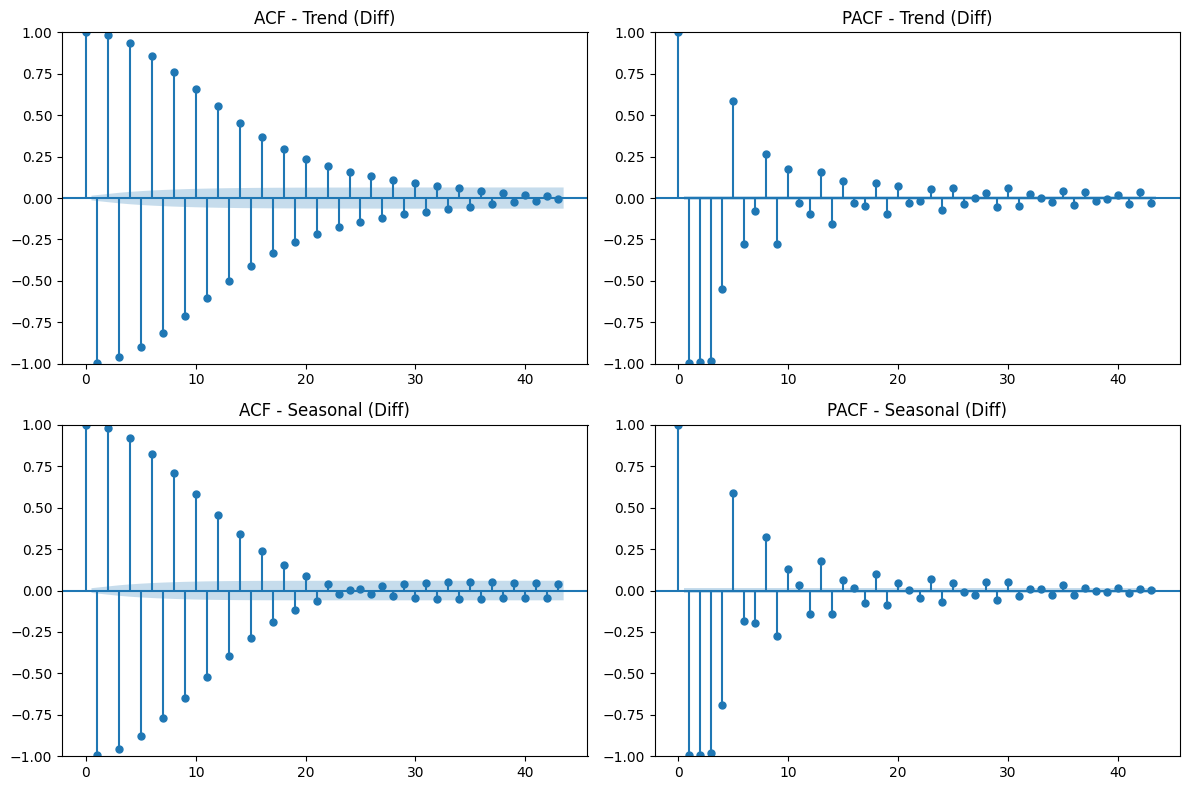

In [23]:
import pandas as pd

# Giả định trend và seasonal là numpy.ndarray
trend_series = pd.Series(trend, index=train.index)
seasonal_series = pd.Series(seasonal, index=train.index)

# Áp dụng diff_function để lấy sai phân
trend_diff180 = trend_diff150.diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna()
trend_diff210 = trend_diff180.diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna()

seasonal_diff180 = seasonal_diff150.diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna()
seasonal_diff210 = seasonal_diff180.diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna()

# Vẽ ACF và PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(12, 8))
plot_acf(trend_diff210, ax=ax[0, 0], title="ACF - Trend (Diff)")
plot_pacf(trend_diff210, ax=ax[0, 1], title="PACF - Trend (Diff)")
plot_acf(seasonal_diff210, ax=ax[1, 0], title="ACF - Seasonal (Diff)")
plot_pacf(seasonal_diff210, ax=ax[1, 1], title="PACF - Seasonal (Diff)")
plt.tight_layout()
plt.show()


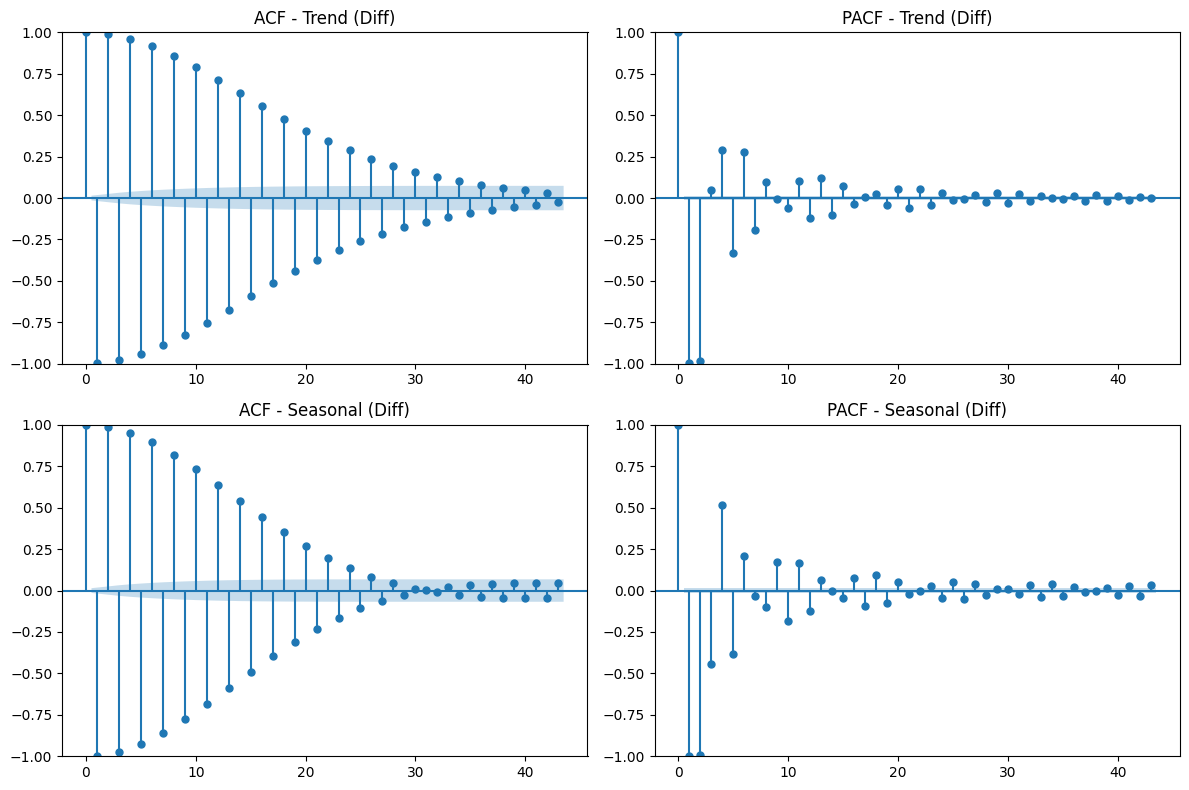

In [24]:
import pandas as pd

# Giả định trend và seasonal là numpy.ndarray
trend_series = pd.Series(trend, index=train.index)
seasonal_series = pd.Series(seasonal, index=train.index)

# Áp dụng diff_function để lấy sai phân
trend_diff240 = trend_diff210.diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna()
trend_diff270 = trend_diff240.diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna()
trend_diff300 = trend_diff270.diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna()
trend_diff330 = trend_diff300.diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna()
trend_diff360 = trend_diff330.diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna()

seasonal_diff240 = seasonal_diff210.diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna()
seasonal_diff270 = seasonal_diff240.diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna()
seasonal_diff300 = seasonal_diff270.diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna()
seasonal_diff330 = seasonal_diff300.diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna()
seasonal_diff360 = seasonal_diff330.diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna().diff().dropna()

# Vẽ ACF và PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(12, 8))
plot_acf(trend_diff360, ax=ax[0, 0], title="ACF - Trend (Diff)")
plot_pacf(trend_diff360, ax=ax[0, 1], title="PACF - Trend (Diff)")
plot_acf(seasonal_diff360, ax=ax[1, 0], title="ACF - Seasonal (Diff)")
plot_pacf(seasonal_diff360, ax=ax[1, 1], title="PACF - Seasonal (Diff)")
plt.tight_layout()
plt.show()


In [ ]:
# # Chon bac cua mo hinh ARMA cho cac thanh phan trend, seasonal, cycle
# from statsmodels.tsa.arima.model import ARIMA

# # Hàm chọn bậc ARIMA
# def select_order(data):
#     best_aic = np.inf
#     best_order = None
#     best_model = None
#     # for p in range(3):
#     #     for d in range(2):
#     #         for q in range(3):
#                 try:
#                     model = ARIMA(data, order=(p, d, q))
#                     model_fit = model.fit()
#                     aic = model_fit.aic
#                     if aic < best_aic:
#                         best_aic = aic
#                         best_order = (p, d, q)
#                         best_model = model_fit
#                 except:
#                     pass
    
#     return best_order, best_model


# # Chọn bậc cho từng thành phần
# best_trend_order, best_trend_model = select_order(trend)
# print("Trend:", best_trend_order)
# best_cycle_order, best_cycle_model = select_order(cycle)
# print("Cycle:", best_cycle_order)
# best_seasonal_order, best_seasonal_model = select_order(seasonal)
# print("Seasonal:", best_seasonal_order)
# best_residual_order, best_residual_model = select_order(residual)
# print("Residual:", best_residual_order)

/Data/Projects/venv_manager/ai_work#311/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Data/Projects/venv_manager/ai_work#311/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Data/Projects/venv_manager/ai_work#311/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Data/Projects/venv_manager/ai_work#311/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maxim

# Mô hình hóa từng thành phần

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Chuẩn bị dữ liệu
time_index = np.arange(len(trend)).reshape(-1, 1)
model_trend = LinearRegression().fit(time_index, trend)

# Dự báo
forecast_trend = model_trend.predict(time_index)

from statsmodels.tsa.statespace.varmax import VARMAX

# VAR cho thành phần Cycle (chu kỳ)
model_cycle = VARMAX(cycle.reshape(-1, 1), order=(2, 0)).fit(disp=False)
forecast_cycle = model_cycle.forecast(steps=test_size)

from statsmodels.tsa.statespace.sarimax import SARIMAX

# SARIMA cho tính mùa vụ
model_seasonal = SARIMAX(seasonal, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit(disp=False)
forecast_seasonal = model_seasonal.forecast(steps=test_size)

from arch import arch_model

# GARCH cho phần dư
model_residual = arch_model(residual, vol='Garch', p=1, q=1).fit(disp='off')
forecast_residual = model_residual.forecast(horizon=test_size).variance

final_forecast = forecast_trend + forecast_cycle.flatten() + forecast_seasonal + forecast_residual.flatten()

# Vẽ dự báo so với thực tế
plt.figure(figsize=(10, 6))
plt.plot(test.index, test.values, label="Thực tế")
plt.plot(test.index, final_forecast, label="Dự báo", linestyle='--')
plt.legend()
plt.title("Dự báo lợi tức trái phiếu")
plt.show()
